Advanced Concepts in Machine Learning

Assignment 1: Implementing Backpropagation

This assignment was made by DACS master students:

Juliette Maes, i6230492

Iulian Simuţ, i6345366

## Implement backpropagation

**Here we test different parameter configuration**

---



In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

# Hyperbolic tangent (tanh) activation function
def tanh(x):
    return np.tanh(x)

def tanh_derivative(output):
    return 1 - np.tanh(output)**2

# Experiments
alpha_values = [0.001, 0.01, 0.1, 1]
init_w_values = ['random', 'zero']
init_b_values = ['random', 'zero']

# Neural network training function with experiments
def train_NN(activation_fn, fn_derivative, name, alpha_values, init_w, init_b):
    for alpha in alpha_values:
        for w_init in init_w:
            for b_init in init_b:
                # Neural network parameters
                input_size = 8
                hidden_size = 3
                output_size = 8
                epochs = 10000

                np.random.seed(42)

                # Initialize weights and biases based on experiment settings
                if w_init == 'random':
                    w1 = np.random.uniform(-1, 1, (input_size, hidden_size))
                    w2 = np.random.uniform(-1, 1, (hidden_size, output_size))
                else:
                    w1 = np.zeros((input_size, hidden_size))
                    w2 = np.zeros((hidden_size, output_size))

                if b_init == 'random':
                    b1 = np.random.uniform(-1, 1, hidden_size)
                    b2 = np.random.uniform(-1, 1, output_size)
                else:
                    b1 = np.zeros(hidden_size)
                    b2 = np.zeros(output_size)

                if activation_fn == tanh:
                  w1 /= np.max(np.abs(w1))
                  w2 /= np.max(np.abs(w2))
                else:
                  continue

                print(f"Activation function: {name}")
                print(f"Alpha: {alpha}")
                print(f"Weight Initialization: {w_init}")
                print(f"Bias Initialization: {b_init}\n")

                # Training data
                training_data = np.array([
                    [0, 0, 0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 0, 1, 0, 0],
                    [0, 0, 0, 0, 1, 0, 0, 0],
                    [0, 0, 0, 1, 0, 0, 0, 0],
                    [0, 0, 1, 0, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 0, 0],
                    [1, 0, 0, 0, 0, 0, 0, 0]
                ])

                # Record loss values, weights/biases history, and hidden activations
                epoch_losses = []
                w_hist = {'w1': [], 'w2': []}
                b_hist = {'b1': [], 'b2': []}
                a2_hist = []

                # Training loop
                for epoch in range(epochs):
                    epoch_loss = 0
                    for x in training_data:
                        # Forward propagation
                        a2 = activation_fn(np.dot(x, w1) + b1)
                        a3 = activation_fn(np.dot(a2, w2) + b2)

                        # Calculate the loss/cost
                        loss = np.mean((a3 - x) ** 2)
                        epoch_loss += loss

                        # Backpropagation
                        output_error = x - a3
                        delta3 = output_error * fn_derivative(a3)

                        hidden_error = delta3.dot(w2.T)
                        delta2 = hidden_error * fn_derivative(a2)

                        # Update weights and biases
                        w2 += a2[:, None] * delta3[None, :] * alpha
                        w1 += x[:, None] * delta2[None, :] * alpha

                        b2 += delta3 * alpha
                        b1 += delta2 * alpha

                    # Average loss for the epoch
                    epoch_loss /= len(training_data)
                    epoch_losses.append(epoch_loss)

                    # Store the mean absolute values of weights and biases
                    w_hist['w1'].append(np.mean(np.abs(w1)))
                    w_hist['w2'].append(np.mean(np.abs(w2)))
                    b_hist['b1'].append(np.mean(np.abs(b1)))
                    b_hist['b2'].append(np.mean(np.abs(b2)))

                # After training, record the hidden node activations for each input
                for x in training_data:
                    hidden_activation = activation_fn(np.dot(x, w1) + b1)
                    a2_hist.append(hidden_activation)

                # Final weights for interpreting
                final_w1 = w1
                final_w2 = w2
                final_b1 = b1
                final_b2 = b2

                # Print the weights w1 and activation a2
                print("\nFinal w(1) weights:\n", final_w1)
                print("\nFinal a(2) activations for each input:")
                for i, activation in enumerate(a2_hist):
                    print(f"Input {i+1}: {activation}")

                # Plot the loss over epochs
                plt.figure(figsize=(10, 5))
                plt.plot(epoch_losses, label='Training Loss')
                plt.title(f'Loss over epochs ({name}) - Alpha={alpha}, W_init={w_init}, B_init={b_init}')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.show()

                # Plot the evolution of weights and biases
                plt.figure(figsize=(14, 6))
                # Plot weights
                plt.subplot(1, 2, 1)
                plt.plot(w_hist['w1'], label='Input Layer Weights')
                plt.plot(w_hist['w2'], label='Hidden Layer Weights')
                plt.title(f'Evolution of Weights ({name}) - Alpha={alpha}, W_init={w_init}, B_init={b_init}')
                plt.xlabel('Epoch')
                plt.ylabel('Mean Absolute Weight Value')
                plt.legend()

                # Plot biases
                plt.subplot(1, 2, 2)
                plt.plot(b_hist['b1'], label='Input Layer Biases')
                plt.plot(b_hist['b2'], label='Hidden Layer Biases')
                plt.title(f'Evolution of Biases ({name}) - Alpha={alpha}, W_init={w_init}, B_init={b_init}')
                plt.xlabel('Epoch')
                plt.ylabel('Mean Absolute Bias Value')
                plt.legend()

                plt.tight_layout()
                plt.show()


#train with different parameters and sigmoid activation
train_NN(sigmoid, sigmoid_derivative, 'sigmoid', alpha_values, init_w_values, init_b_values)

#train with different parameters tanh activation
train_NN(tanh, tanh_derivative, 'tanh', alpha_values, init_w_values, init_b_values)

**The output of this first code snipped was removed in order to make the PDF more readable.**


This is an observation we made on it:


Activation function: tanh

Alpha: 0.01


Weight Initialization: zero


Bias Initialization: zero



--> This does not work because alpha is too small so having weight and bias initialized to 0 does not help the model learn effectively, resulting in NaN values.

here we test the best configuaration to train our model

Results obtained with these parameters:

Learning rate (alpha): 0.1
Input layer weights w1:
 [[-0.25091976  0.90142861  0.46398788]
 [ 0.19731697 -0.68796272 -0.68801096]
 [-0.88383278  0.73235229  0.20223002]
 [ 0.41614516 -0.95883101  0.9398197 ]
 [ 0.66488528 -0.57532178 -0.63635007]
 [-0.63319098 -0.39151551  0.04951286]
 [-0.13610996 -0.41754172  0.22370579]
 [-0.72101228 -0.4157107  -0.26727631]]
Hidden layer weights:
 [[-0.08786003  0.57035192 -0.60065244  0.02846888  0.18482914 -0.90709917
   0.2150897  -0.65895175]
 [-0.86989681  0.89777107  0.93126407  0.6167947  -0.39077246 -0.80465577
   0.36846605 -0.11969501]
 [-0.75592353 -0.00964618 -0.93122296  0.8186408  -0.48244004  0.32504457
  -0.37657785  0.04013604]]
Input layer biases b1:
 [0. 0. 0.]
Hidden layer biases b2:
 [0. 0. 0. 0. 0. 0. 0. 0.]


Epoch 0, Loss: 0.2345
Epoch 1000, Loss: 0.0513
Epoch 2000, Loss: 0.0326
Epoch 3000, Loss: 0.0185
Epoch 4000, Loss: 0.0087
Epoch 5000, Loss: 0.0053
Epoch 6000, Loss: 0.0038
Epoch 7

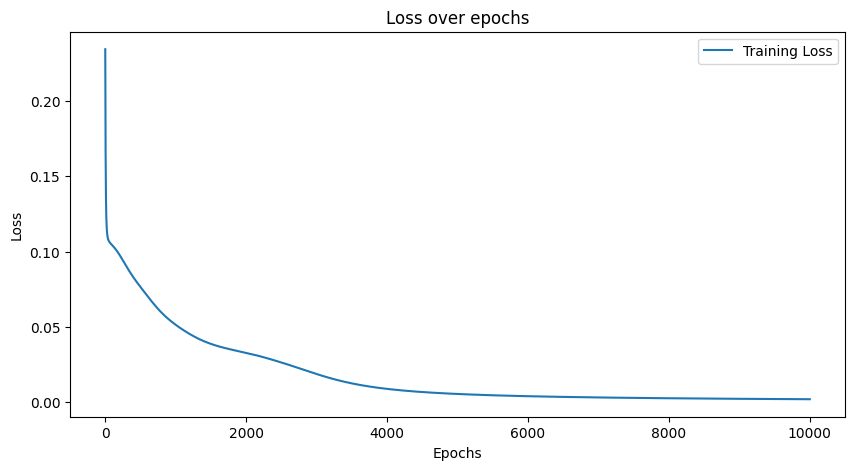

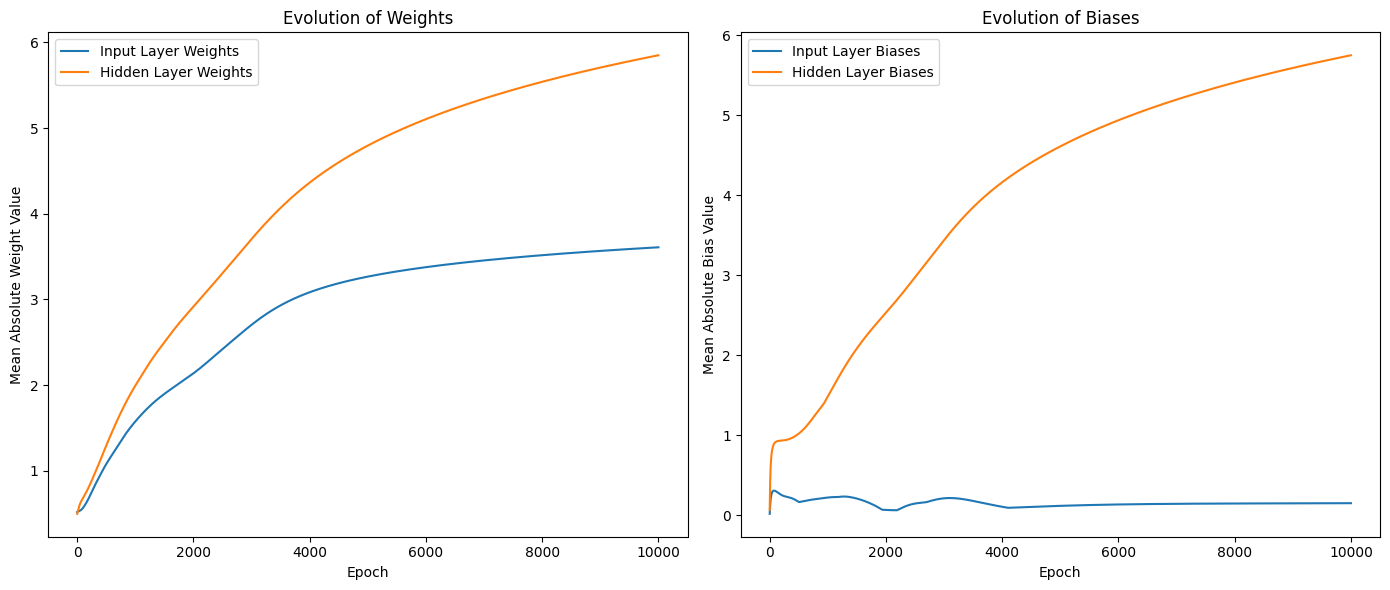

In [ ]:

# Neural network parameters
input_size = 8
hidden_size = 3
output_size = 8
alpha = 0.1 # learning rate
epochs = 10000

np.random.seed(42)

# Initialize weights, random or zero values
w1 = np.random.uniform(-1, 1, (input_size, hidden_size))
w2 = np.random.uniform(-1, 1, (hidden_size, output_size))
# w1 = np.zeros((input_size, hidden_size))
# w2 = np.zeros((hidden_size, output_size))

# Initialize biases, zeros or random values
b1 = np.zeros(hidden_size)
b2 = np.zeros(output_size)
# b1 = np.random.uniform(-1, 1, hidden_size)
# b2 = np.random.uniform(-1, 1, output_size)


# Print a message with the parameters to be easier when interpret
print(f"Results obtained with these parameters:\n")
print(f"Learning rate (alpha): {alpha}")
print(f"Input layer weights w1:\n {w1}")
print(f"Hidden layer weights:\n {w2}")
print(f"Input layer biases b1:\n {b1}")
print(f"Hidden layer biases b2:\n {b2}")
print("\n")

# Training data
training_data = np.array([
                        [0, 0, 0, 0, 0, 0, 0, 1],
                        [0, 0, 0, 0, 0, 0, 1, 0],
                        [0, 0, 0, 0, 0, 1, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0],
                        [0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 1, 0, 0, 0, 0, 0],
                        [0, 1, 0, 0, 0, 0, 0, 0],
                        [1, 0, 0, 0, 0, 0, 0, 0]
                        ])

# Record loss values, weights/biases history, and hidden activations
epoch_losses = []
w_hist = {'w1': [], 'w2': []}
b_hist = {'b1': [], 'b2': []}
a2_hist = []

# Training loop
for epoch in range(epochs):
    epoch_loss = 0
    for x in training_data:
        # Forward propagation
        a2 = sigmoid(np.dot(x, w1) + b1)
        a3 = sigmoid(np.dot(a2, w2) + b2)

        # Calculate the loss/cost
        loss = np.mean((a3 - x) ** 2)
        epoch_loss += loss

        # Backpropagation
        output_error = x - a3
        delta3 = output_error * sigmoid_derivative(a3)

        hidden_error = delta3.dot(w2.T)
        delta2 = hidden_error * sigmoid_derivative(a2)

        # Update weights and biases
        w2 += a2[:, None] * delta3[None, :] * alpha
        w1 += x[:, None] * delta2[None, :] * alpha
        # #####################
        # w2 += alpha * np.outer(a2, delta3)
        # w1 += alpha * np.outer(x, delta2)
        b2 += delta3 * alpha
        b1 += delta2 * alpha

    # Average loss for the epoch
    epoch_loss /= len(training_data)
    epoch_losses.append(epoch_loss)

    # Print the loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {epoch_loss:.4f}')

    # Store the mean absolute values of weights and biases
    w_hist['w1'].append(np.mean(np.abs(w1)))
    w_hist['w2'].append(np.mean(np.abs(w2)))
    b_hist['b1'].append(np.mean(np.abs(b1)))
    b_hist['b2'].append(np.mean(np.abs(b2)))

## End training



# After training, record the hidden node activations for each input
for x in training_data:
    hidden_activation = sigmoid(np.dot(x, w1) + b1)
    a2_hist.append(hidden_activation)

# Final weights for interpreting
final_w1 = w1
final_w2 = w2
final_b1 = b1
final_b2 = b2

# Print the weights w1 and activation a2
print("\nFinal w(1) weights:\n", final_w1)
print("\nFinal a(2) activations for each input:")
for i, activation in enumerate(a2_hist):
    print(f"Input {i+1}: {activation}")



# Plot the loss over epochs
plt.figure(figsize=(10,5))
plt.plot(epoch_losses, label='Training Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the evolution of weights and biases
plt.figure(figsize=(14, 6))
# Plot weights
plt.subplot(1, 2, 1)
plt.plot(w_hist['w1'], label='Input Layer Weights')
plt.plot(w_hist['w2'], label='Hidden Layer Weights')
plt.title('Evolution of Weights')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Weight Value')
plt.legend()

# Plot biases
plt.subplot(1, 2, 2)
plt.plot(b_hist['b1'], label='Input Layer Biases')
plt.plot(b_hist['b2'], label='Hidden Layer Biases')
plt.title('Evolution of Biases')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Bias Value')
plt.legend()

plt.tight_layout()
plt.show()


## Test the trained NN

here we test our final model

In [ ]:
# Test our trained NN:

#create the testing data
num_examples = 8

input_size = 8

test_data = np.zeros((num_examples, input_size), dtype=int)

for i in range(num_examples): #loop to make all the different training data with a 1
    test_data[i, i] = 1

np.random.shuffle(test_data) #shuffle to have random order

#Initialize variables to check validity
correct_pred = 0
total_pred = 0

test_loss = 0

# Test the trained network
print("\nTesting the trained network:")
for input_data in test_data:
    a2test = sigmoid(np.dot(input_data, final_w1) + final_b1)
    a3 = sigmoid(np.dot(a2test, final_w2) + final_b2)

    #check loss
    loss = np.mean((a3 - input_data) ** 2)
    test_loss += loss

    #Check accuracy
    is_correct = np.all(a3.round() == input_data)
    if is_correct:
        correct_pred += 1
    total_pred += 1

    print(f'Input: {input_data}, Output: {a3.round()}, Correct: {is_correct}')

#Calculate accuracy
accuracy = correct_pred / total_pred
print(f"\n Accuracy: {accuracy * 100:.2f}%")

#average test loss
test_loss /= len(test_data)
print(f"\n Test Loss: {test_loss:.4f}")



Testing the trained network:
Input: [0 1 0 0 0 0 0 0], Output: [0. 1. 0. 0. 0. 0. 0. 0.], Correct: True
Input: [0 0 0 0 0 1 0 0], Output: [0. 0. 0. 0. 0. 1. 0. 0.], Correct: True
Input: [1 0 0 0 0 0 0 0], Output: [1. 0. 0. 0. 0. 0. 0. 0.], Correct: True
Input: [0 0 0 0 0 0 0 1], Output: [0. 0. 0. 0. 0. 0. 0. 1.], Correct: True
Input: [0 0 1 0 0 0 0 0], Output: [0. 0. 1. 0. 0. 0. 0. 0.], Correct: True
Input: [0 0 0 0 1 0 0 0], Output: [0. 0. 0. 0. 1. 0. 0. 0.], Correct: True
Input: [0 0 0 1 0 0 0 0], Output: [0. 0. 0. 1. 0. 0. 0. 0.], Correct: True
Input: [0 0 0 0 0 0 1 0], Output: [0. 0. 0. 0. 0. 0. 1. 0.], Correct: True

 Accuracy: 100.00%

 Test Loss: 0.0018


A low test loss and a high accuracy tells about the good generalization and effective learning of the model.

# Interpretations

I will add some comments here:


ii) a brief description of the learning performance of your network
(how many examples does it need to converge, how long does that take, does it converge every time or do you have to
be lucky with the parameters
- we tested with 10, 100, 1000 and 10.000 epochs. The network starts to converge from 100 epochs, but we saw that the weights are not reaching a stable value (keep increasing), and the test showed that this model couldn't reproduce the input values. With 10.000 epochs the cost function and the weights are converging to a stable point(state), and the tests with this learned parameters showed that the model reproduce exact the same input values (100% accuracy).
- with 10000 epochs, the code run in less than 1 minute
- from multiple different tests, we saw that the model with 10.000 epochs, if the weights are initialized with random values (not zero).

iii)your interpretation of the learned weights:
- the mean value of learned weighs show that they stabilize with the convergence of the cost function
- we also saw that the mean of the hidden layer weights is bigger, meaning that those are more important for the network.

- plots when use 100 epochs (loss is about 0.12):
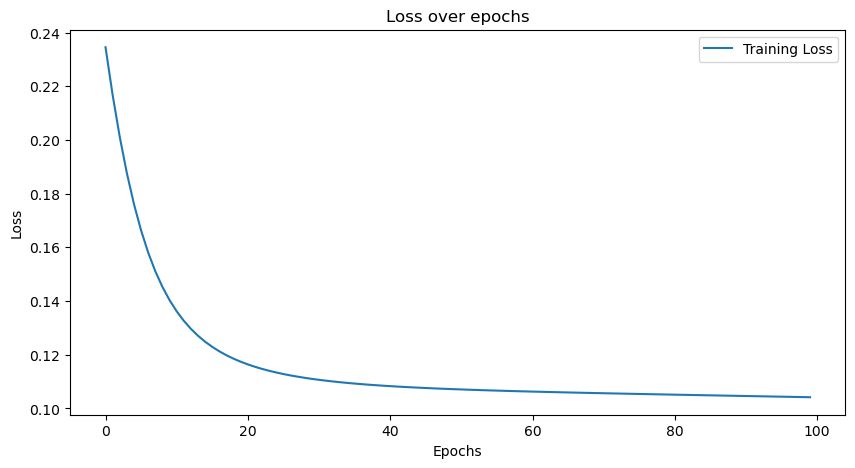
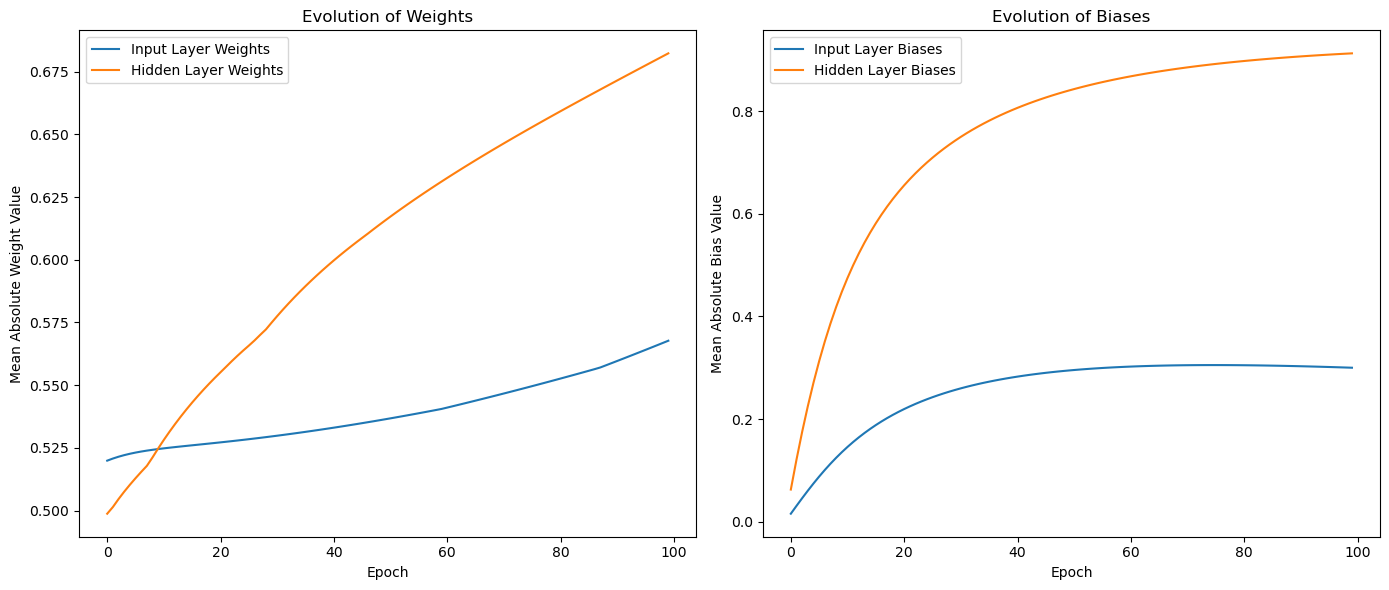

- with 10.000 epochs(loss is 0.0024):
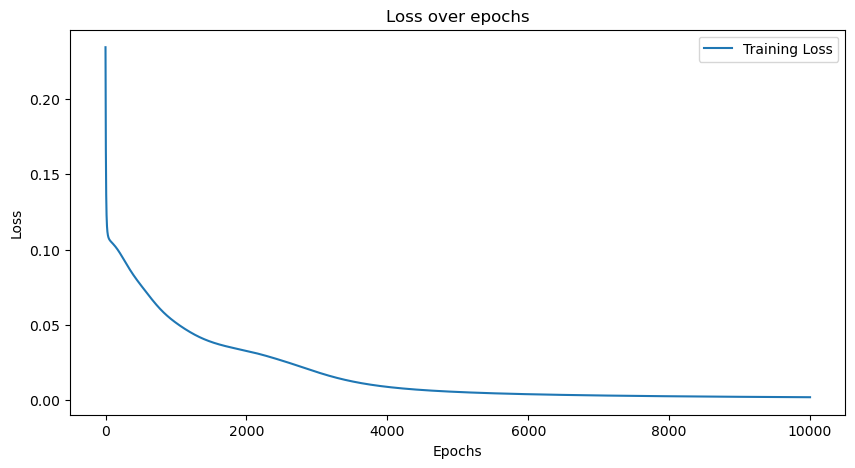
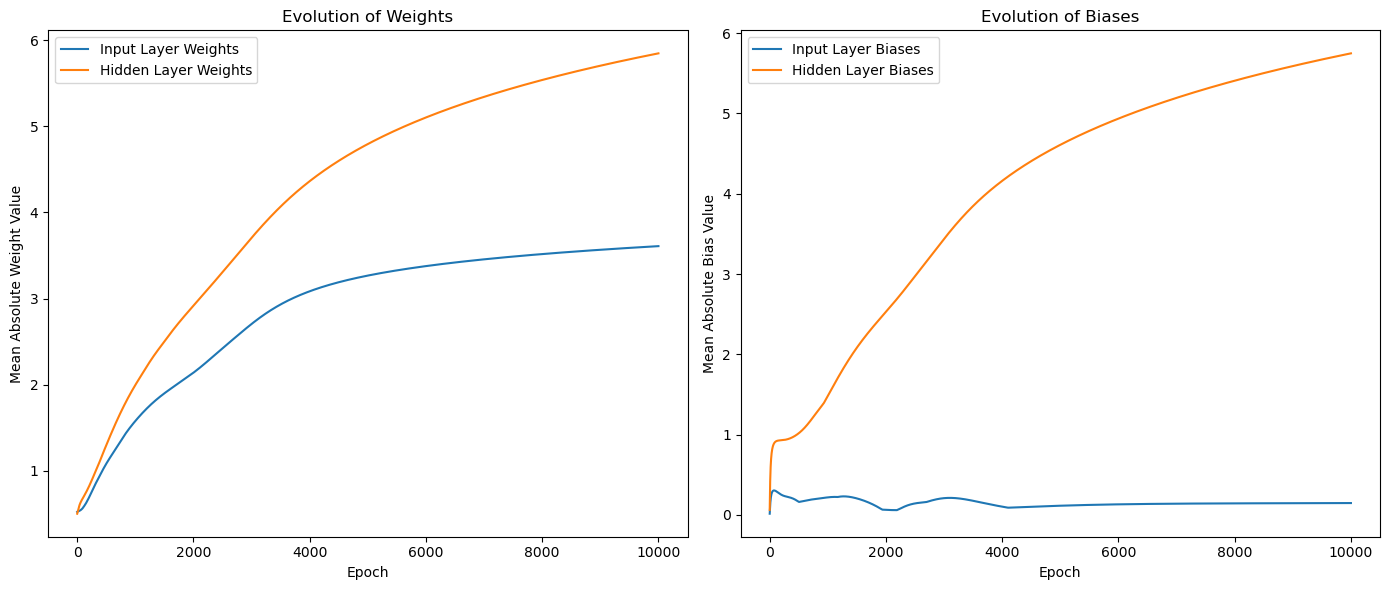



In [ ]:
#end